In [17]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.colors as mcolors

## Code to compare ENSEMBLE, IMERG and ERA5

In [6]:
obs_base = os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'QC_MIX')

In [7]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5.,  10.,  20.,  50., 100., 200.]

In [8]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))   
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [14]:
ISO_names = pd.read_csv(os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'ISO_IT_REGION_EN.csv'))
REGIONS_merged = REGIONS.merge(ISO_names, on="Region")
dict_keys = ISO_names['ISO'].values

In [38]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_ensemble_relative_error.csv')
ENSEMBLE_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'OBS_relative_error_lat.csv')
ENSEMBLE_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'OBS_relative_error_lon.csv')
ENSEMBLE_RE_LON = pd.read_csv(dir_in)

In [ ]:
RE_DOWN_ALL, RE_DOWN_ALL_NORM, LAT_DOWN_ALL, LON_DOWN_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_DOWN_tmp = ENSEMBLE_RE[dict_keys[pos]].values
    RE_DOWN_lat = ENSEMBLE_RE_LAT[dict_keys[pos]].values
    RE_DOWN_lon = ENSEMBLE_RE_LON[dict_keys[pos]].values

    RE_DOWN_lat = RE_DOWN_lat[~np.isnan(RE_DOWN_tmp)]
    RE_DOWN_lon = RE_DOWN_lon[~np.isnan(RE_DOWN_tmp)]
    RE_DOWN_tmp = RE_DOWN_tmp[~np.isnan(RE_DOWN_tmp)]

    val_DOWN = abs(RE_DOWN_tmp)
    val_DOWN_norm = (val_DOWN - np.min(val_DOWN))/(np.nanmax(val_DOWN) - np.min(val_DOWN))
    
    RE_DOWN_ALL.extend(RE_DOWN_tmp)
    RE_DOWN_ALL_NORM.extend(val_DOWN_norm)
    LAT_DOWN_ALL.extend(RE_DOWN_lat)
    LON_DOWN_ALL.extend(RE_DOWN_lon)

In [40]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_IMERG_relative_error.csv')
IMERG_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_IMERG_OBS_relative_error_lat.csv')
IMERG_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_IMERG_OBS_relative_error_lon.csv')
IMERG_RE_LON = pd.read_csv(dir_in)

In [42]:
RE_IMERG_ALL, RE_IMERG_ALL_NORM, LAT_IMERG_ALL, LON_IMERG_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_IMERG_tmp = IMERG_RE[dict_keys[pos]].values
    RE_IMERG_lat = IMERG_RE_LAT[dict_keys[pos]].values
    RE_IMERG_lon = IMERG_RE_LON[dict_keys[pos]].values

    RE_IMERG_lat = RE_IMERG_lat[~np.isnan(RE_IMERG_tmp)]
    RE_IMERG_lon = RE_IMERG_lon[~np.isnan(RE_IMERG_tmp)]
    RE_IMERG_tmp = RE_IMERG_tmp[~np.isnan(RE_IMERG_tmp)]

    val_IMERG = abs(RE_IMERG_tmp)
    val_IMERG_norm = (val_IMERG - np.min(val_IMERG))/(np.nanmax(val_IMERG) - np.min(val_IMERG))
    
    RE_IMERG_ALL.extend(RE_IMERG_tmp)
    RE_IMERG_ALL_NORM.extend(val_IMERG_norm)
    LAT_IMERG_ALL.extend(RE_IMERG_lat)
    LON_IMERG_ALL.extend(RE_IMERG_lon)

In [44]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_ERA5_relative_error.csv')
ERA5_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_ERA5_OBS_relative_error_lat.csv')
ERA5_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_ERA5_OBS_relative_error_lon.csv')
ERA5_RE_LON = pd.read_csv(dir_in)

In [45]:
RE_ERA5_ALL, RE_ERA5_ALL_NORM, LAT_ERA5_ALL, LON_ERA5_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_ERA5_tmp = ERA5_RE[dict_keys[pos]].values
    RE_ERA5_lat = ERA5_RE_LAT[dict_keys[pos]].values
    RE_ERA5_lon = ERA5_RE_LON[dict_keys[pos]].values

    RE_ERA5_lat = RE_ERA5_lat[~np.isnan(RE_ERA5_tmp)]
    RE_ERA5_lon = RE_ERA5_lon[~np.isnan(RE_ERA5_tmp)]
    RE_ERA5_tmp = RE_ERA5_tmp[~np.isnan(RE_ERA5_tmp)]

    val_ERA5 = abs(RE_ERA5_tmp)
    val_ERA5_norm = (val_ERA5 - np.min(val_ERA5))/(np.nanmax(val_ERA5) - np.min(val_ERA5))
    
    RE_ERA5_ALL.extend(RE_ERA5_tmp)
    RE_ERA5_ALL_NORM.extend(val_ERA5_norm)
    LAT_ERA5_ALL.extend(RE_ERA5_lat)
    LON_ERA5_ALL.extend(RE_ERA5_lon)

In [18]:
levels = np.arange(-1,1.1,0.1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Export figure to: ../figures/Article_down/RE_ENSEMBLE_IMERG_ERA5.png


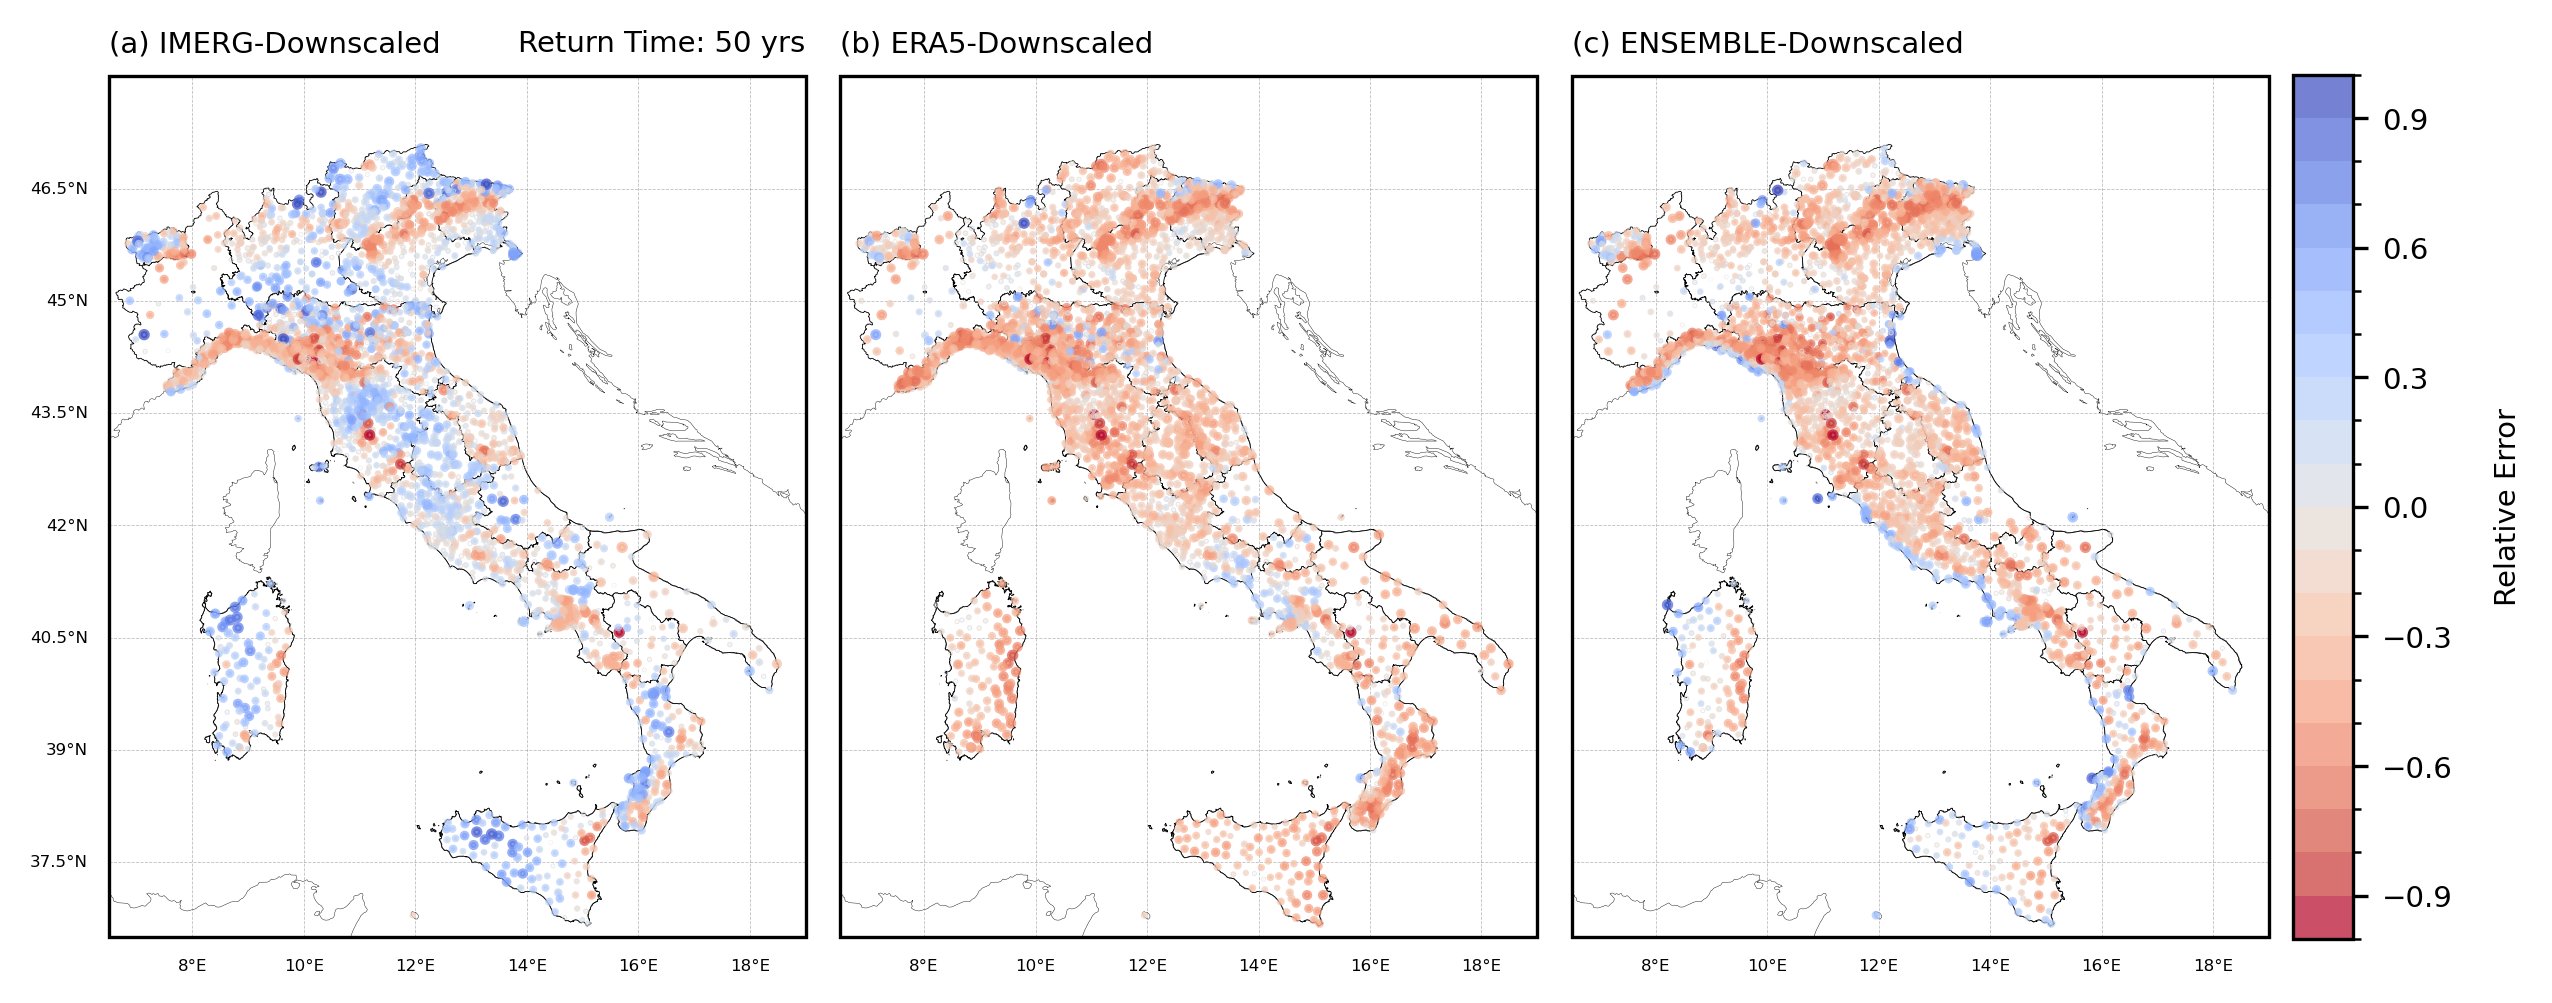

In [46]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.2, ax=ax1)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(LON_IMERG_ALL, LAT_IMERG_ALL, c=RE_IMERG_ALL, cmap='coolwarm_r', s=np.array(RE_IMERG_ALL_NORM)*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) IMERG-Downscaled', fontsize=7, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.2, ax=ax1)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(LON_ERA5_ALL, LAT_ERA5_ALL, c=RE_ERA5_ALL, cmap='coolwarm_r', s=np.array(RE_ERA5_ALL_NORM)*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(b) ERA5-Downscaled', fontsize=7, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.2, ax=ax1)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(LON_DOWN_ALL, LAT_DOWN_ALL, c=RE_DOWN_ALL, cmap='coolwarm_r', s=np.array(RE_DOWN_ALL_NORM)*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(c) ENSEMBLE-Downscaled', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.1)

cbar_ax = fig.add_axes([0.96, 0.14, 0.025, 0.72])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=7)
cbar.set_label("Relative Error", fontsize=7, labelpad=10)  

salida = os.path.join('..','figures','Article_down','RE_ENSEMBLE_IMERG_ERA5.png')
print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)